In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('preprocessed reviews dataset.csv')
df.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort love itveri pretti
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin ive mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,pillow save back love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price
4,4,Home_and_Kitchen_5,5.0,CG,nice set good qualiti set two month


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.isnull().sum()

category    0
rating      0
label       0
text_       1
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df['length']=df['text_'].apply(len)

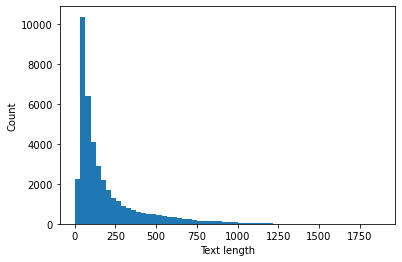

In [7]:
plt.hist(df['length'],bins=60)
plt.xlabel('Text length')
plt.ylabel('Count')
plt.show()

In [8]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20215.0  4.259906  1.141092  1.0  4.0  5.0  5.0  5.0  20215.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                
             mean         std  min   25%    50%    75%     max  
label                                                           
CG     154.893693  155.939947  4.0  51.0   88.0  192.0  1191.0  
OR     220.813465  235.369501  8.0  68.0  124.0  274.0  1872.0

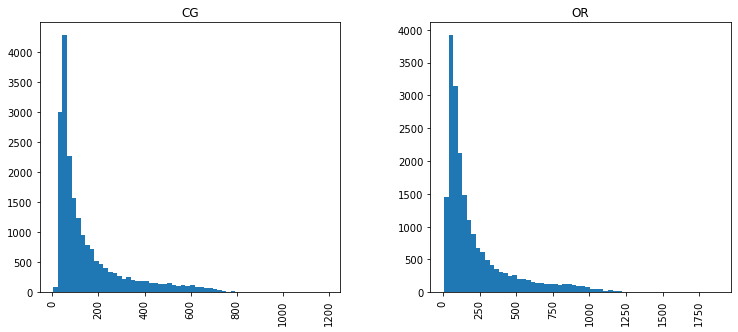

In [9]:
df.hist(column='length',by='label',bins=60,figsize=(12,5))
plt.show()

In [10]:
df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head()

,text_,length
15555,weak current scienc see twice agre much posit ...,1872
15525,toni randal star success spoil rock hunter opp...,1862
23613,compar rawhid tonbspa datahookproductlinklink ...,1831
19301,thought id purchas item also atnbspa datahookp...,1823
23593,first let say spoil dog im sure peopl littl ma...,1472


In [11]:
df['label']=df['label'].apply(lambda x: 1 if x=="CG" else 0)
df.head()

,category,rating,label,text_,length
0,Home_and_Kitchen_5,5.0,1,love well made sturdi comfort love itveri pretti,48
1,Home_and_Kitchen_5,5.0,1,love great upgrad origin ive mine coupl year,44
2,Home_and_Kitchen_5,5.0,1,pillow save back love look feel pillow,38
3,Home_and_Kitchen_5,1.0,1,miss inform use great product price,35
4,Home_and_Kitchen_5,5.0,1,nice set good qualiti set two month,35


In [12]:
df.length.describe()

count    40431.000000
mean       187.854394
std        202.345778
min          4.000000
25%         58.000000
50%        105.000000
75%        231.000000
max       1872.000000
Name: length, dtype: float64

In [13]:
from nltk.tokenize import word_tokenize
punc=set(string.punctuation)
stop_words=stopwords.words('english')
def text_process(review):
    nopunc=''.join([word for word in review if word not in punc])
    return ' '.join([word for word in word_tokenize(nopunc) if word.lower() not in stop_words])

In [14]:
text_process('loved much book amazing')

'loved much book amazing'

In [15]:
vectorizer=CountVectorizer()
vectorizer

CountVectorizer()

In [16]:
vectorizer.fit(df['text_'])
print("Total vocabulary:",len(vectorizer.vocabulary_))

Total vocabulary: 37316


In [17]:
print(vectorizer.get_feature_names_out()[:50])

['00' '000' '0005' '00199' '00200' '0036in' '0061849278' '007' '009'
 '00believ' '01' '010' '01192015' '013014' '01302016' '014' '016'
 '0182196' '01oz' '02' '021114' '0223' '02262015' '024' '02v' '03' '0308'
 '032012' '032018' '03292015' '034536161x' '03in' '04' '04112017' '041715'
 '045day' '05' '055xprob' '05mm' '06' '06132016' '061515' '062015' '07'
 '075' '08' '080' '089' '09' '09mm']


In [18]:
review4=df['text_'][3]
review4

'miss inform use great product price'

In [19]:
msg4=vectorizer.transform([review4])
print(msg4)
print(msg4.shape)

  (0, 14781)	1
  (0, 17356)	1
  (0, 21638)	1
  (0, 25936)	1
  (0, 26083)	1
  (0, 34874)	1
(1, 37316)


In [20]:
print(vectorizer.get_feature_names_out()[30])

034536161x


In [21]:
bow_reviews=vectorizer.transform(df['text_'])

In [22]:
print("Shape of bag of words transfromer for the entire review corpus:",bow_reviews.shape)
print("Amount of non-zero vlaues in the bag of words model:",bow_reviews.nnz)

Shape of bag of words transfromer for the entire review corpus: (40431, 37316)
Amount of non-zero vlaues in the bag of words model: 1018067


In [23]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.07


In [24]:
tfidf_transformer=TfidfTransformer().fit(bow_reviews)
tfidf_rev4=tfidf_transformer.transform(msg4)
print(msg4)

  (0, 14781)	1
  (0, 17356)	1
  (0, 21638)	1
  (0, 25936)	1
  (0, 26083)	1
  (0, 34874)	1


In [25]:
print(tfidf_transformer.idf_[vectorizer.vocabulary_['book']])

2.8236741309927584


In [26]:
bow_reviews

<40431x37316 sparse matrix of type '<class 'numpy.int64'>'
	with 1018067 stored elements in Compressed Sparse Row format>

In [27]:
tfidf_reviews=tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("Number of dimensions:",tfidf_reviews.ndim)

Shape: (40431, 37316)
Number of dimensions: 2


In [28]:
## Creating training and testing dataset
xtrain,xtest,ytrain,ytest=train_test_split(df['text_'],df['label'],test_size=0.3)

In [29]:
## Multinomial Naives Bayer's Classifier

pipeline=Pipeline([('bow',CountVectorizer()),('tfidf',TfidfTransformer()),('classifier',MultinomialNB())])
pipeline.fit(xtrain,ytrain)
nb_pred=pipeline.predict(xtest)
nb_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [30]:
print("Classification report:")
print(classification_report(ytest,nb_pred))
print("Confusion matrix:")
print(confusion_matrix(ytest,nb_pred))
print("Accuracy score:",accuracy_score(ytest,nb_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      6065
           1       0.83      0.89      0.86      6065

    accuracy                           0.85     12130
   macro avg       0.85      0.85      0.85     12130
weighted avg       0.85      0.85      0.85     12130

Confusion matrix:
[[4964 1101]
 [ 683 5382]]
Accuracy score: 0.852926628194559


In [31]:
print('Model prediction accuracy:',str(np.round((accuracy_score(ytest,nb_pred)*100),2)),'%')

Model prediction accuracy: 85.29 %


In [32]:
## Random Forest Classifier

pipeline=Pipeline([('bow',CountVectorizer()),('tfidf',TfidfTransformer()),('classifier',MultinomialNB())])
pipeline.fit(xtrain,ytrain)
rf_pred=pipeline.predict(xtest)
rf_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [33]:
print("Classification report:")
print(classification_report(ytest,rf_pred))
print("Confusion matrix:")
print(confusion_matrix(ytest,rf_pred))
print("Accuracy score:",accuracy_score(ytest,rf_pred))
print('Model prediction accuracy:',str(np.round((accuracy_score(ytest,rf_pred)*100),2)),'%')

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      6065
           1       0.83      0.89      0.86      6065

    accuracy                           0.85     12130
   macro avg       0.85      0.85      0.85     12130
weighted avg       0.85      0.85      0.85     12130

Confusion matrix:
[[4964 1101]
 [ 683 5382]]
Accuracy score: 0.852926628194559
Model prediction accuracy: 85.29 %


In [34]:
## Decision Tree Classifier

pipeline=Pipeline([('bow',CountVectorizer()),('tfidf',TfidfTransformer()),('classifier',DecisionTreeClassifier())])
pipeline.fit(xtrain,ytrain)
dt_pred=pipeline.predict(xtest)
dt_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [35]:
print("Classification report:")
print(classification_report(ytest,dt_pred))
print("Confusion matrix:")
print(confusion_matrix(ytest,dt_pred))
print("Accuracy score:",accuracy_score(ytest,dt_pred))
print('Model prediction accuracy:',str(np.round((accuracy_score(ytest,dt_pred)*100),2)),'%')

Classification report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      6065
           1       0.74      0.75      0.74      6065

    accuracy                           0.74     12130
   macro avg       0.74      0.74      0.74     12130
weighted avg       0.74      0.74      0.74     12130

Confusion matrix:
[[4450 1615]
 [1537 4528]]
Accuracy score: 0.7401483924154988
Model prediction accuracy: 74.01 %


In [36]:
## K-nearest neighbours classifier

pipeline=Pipeline([('bow',CountVectorizer()),('tfidf',TfidfTransformer()),('classifier',KNeighborsClassifier(n_neighbors=2))])
pipeline.fit(xtrain,ytrain)
knn_pred=pipeline.predict(xtest)
print("Classification report:")
print(classification_report(ytest,knn_pred))
print("Confusion matrix:")
print(confusion_matrix(ytest,knn_pred))
print("Accuracy score:",accuracy_score(ytest,knn_pred))
print('Model prediction accuracy:',str(np.round((accuracy_score(ytest,knn_pred)*100),2)),'%')

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.58      0.66      6065
           1       0.66      0.83      0.74      6065

    accuracy                           0.70     12130
   macro avg       0.72      0.70      0.70     12130
weighted avg       0.72      0.70      0.70     12130

Confusion matrix:
[[3504 2561]
 [1040 5025]]
Accuracy score: 0.7031327287716406
Model prediction accuracy: 70.31 %


In [37]:
## Logistic Regression

pipeline=Pipeline([('bow',CountVectorizer()),('tfidf',TfidfTransformer()),('classifier',LogisticRegression())])
pipeline.fit(xtrain,ytrain)
reg_pred=pipeline.predict(xtest)
print("Classification report:")
print(classification_report(ytest,reg_pred))
print("Confusion matrix:")
print(confusion_matrix(ytest,reg_pred))
print("Accuracy score:",accuracy_score(ytest,reg_pred))
print('Model prediction accuracy:',str(np.round((accuracy_score(ytest,reg_pred)*100),2)),'%')

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      6065
           1       0.87      0.85      0.86      6065

    accuracy                           0.86     12130
   macro avg       0.86      0.86      0.86     12130
weighted avg       0.86      0.86      0.86     12130

Confusion matrix:
[[5312  753]
 [ 922 5143]]
Accuracy score: 0.8619126133553174
Model prediction accuracy: 86.19 %


In [38]:
## Conclusion

print('Performance of various ML models:')

print('\n')

print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(ytest,reg_pred)*100,2)) + '%')

print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(ytest,knn_pred)*100,2)) + '%')

print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(ytest,dt_pred)*100,2)) + '%')

print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(ytest,rf_pred)*100,2)) + '%')

print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(ytest,nb_pred)*100,2)) + '%')# Hyperparameter-tuning of SVC

Performance of various ML models:


Logistic Regression Prediction Accuracy: 86.19%
K Nearest Neighbors Prediction Accuracy: 70.31%
Decision Tree Classifier Prediction Accuracy: 74.01%
Random Forests Classifier Prediction Accuracy: 85.29%
Multinomial Naive Bayes Prediction Accuracy: 85.29%


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

pipeline = Pipeline([
    ('bow', CountVectorizer(max_features=1000)),  # Limit max features for efficiency
    ('tfidf', TfidfTransformer()), 
    ('classifier', LinearSVC())  # Using LinearSVC for faster training
])

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'bow__ngram_range': [(1, 1), (1, 2)],  # Limit n-gram range
    'tfidf__use_idf': [True],              # Use default IDF (often performs well)
    'classifier__C': uniform(1, 5)         # Limit range of C to reduce search space
}

# Use RandomizedSearchCV with fewer iterations, fewer CV splits, and parallel processing
clf = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=5, cv=2, n_jobs=-1)

# Fit the model on a sample of the data (optional step for reducing computation)
xtrain_sample = xtrain[:1000]  # Adjust sample size as needed
ytrain_sample = ytrain[:1000]

clf.fit(xtrain_sample, ytrain_sample)

# Get best parameters and score
best_params = clf.best_params_
best_score = clf.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)
